# Multi-Dimensional Linear Regression 
# Data Pre-Processing 

The [dataset](https://github.com/ageron/handson-ml/tree/master/datasets/housing) used for this excercise in Multi-Dimensional Linear Regression is a modified version of the California Housing dataset available from [Luís Torgo's page](http://www.dcc.fc.up.pt/%7Eltorgo/Regression/cal_housing.html) (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

## Theoretical background 

- [Generalized Linear Models](http://scikit-learn.org/stable/modules/linear_model.html)
- [Linear Regression Example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) 
--- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("data/housing.csv", na_values='') 

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


--- 
## Missing values

According to [the README.md provided with the dataset](https://github.com/ageron/handson-ml/blob/master/datasets/housing/README.md) 

> The dataset in this directory is almost identical to the original, with two differences:
> - 207 values were randomly removed from the total_bedrooms column, so we can discuss what to do with missing data. [...]

We have decided to produce approximate values for the missing values via a linear regression of a variable with a high correlation. ```total_bedrooms``` correlates highly with ```households``` (0.98) and ```total_rooms``` (0.93). 

A different approach would have been to use [sklearn.preprocessing.Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html). 

In [5]:
missing_values = data[data.isnull().any(axis=1)]

In [6]:
missing_values.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [7]:
# drops rows if any NA values are present (i.e values are missing)
data_valid_values = data.dropna(axis=0,how='any')

In [8]:
data_valid_values.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


--- 
### Splitting dataset into training and testing subsets 

In [9]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [10]:
# Split the dataset pseudo-randomly into training and testing subsets 

"""
for details see http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
"""

# existing values for households need to be converted to a 2D-array 
x = np.array(data_valid_values['households'], dtype=pd.Series).reshape(-1, 1) 

# existing values for total_bedrooms are being transformed to an 1D-array 
y = data_valid_values['total_bedrooms'].values 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=11)
# all variables inherit their format from their parents 

regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Make predictions using the test dataset
y_prediction = regr.predict(x_test)

In [12]:
type(y_prediction)

numpy.ndarray

In [13]:
y_prediction.shape

(4087,)

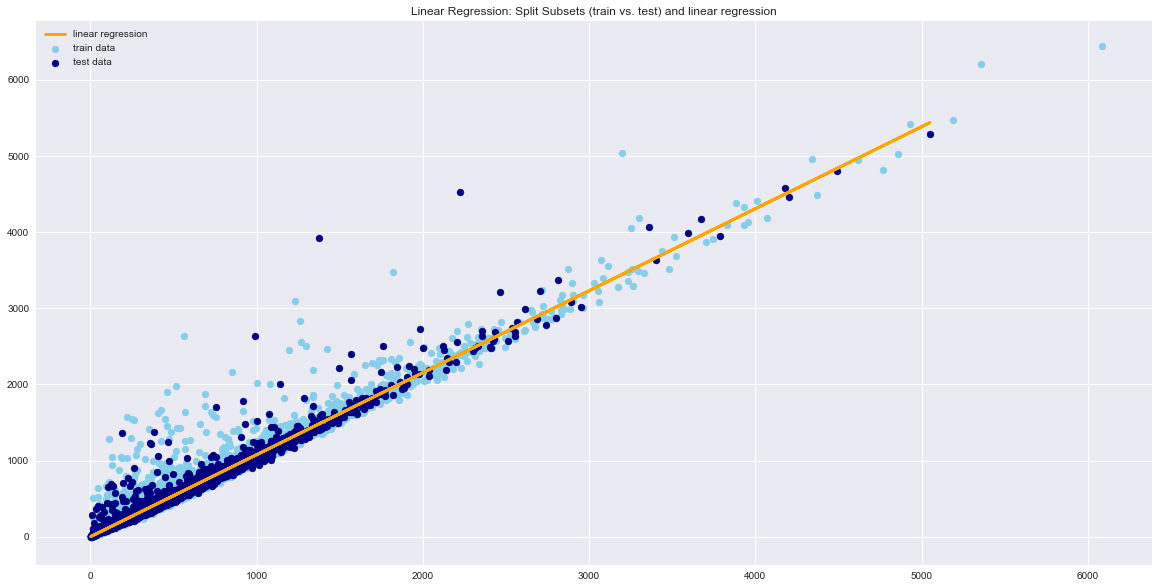

In [14]:
# Plot subsets and prediction 
plt.figure(figsize=(20,10))
plt.scatter(x_train, y_train, color='skyblue', label='train data')
plt.scatter(x_test, y_test, color='navy', label='test data')
plt.plot(x_test, y_prediction, color='orange', linewidth=3, label='linear regression')

# plt.xscale('log')
# plt.yscale('log')

plt.axis('tight')
plt.legend()
plt.title("Linear Regression: Split Subsets (train vs. test) and linear regression")

plt.show();

In [15]:
# The coefficients 
print("Coefficients: %.4f"
      % regr.coef_)

# The Mean Squared Error (MSE) 
print("Mean Squared Error: %.4f"
      % mean_squared_error(y_test, y_prediction))

# Explained variance score: 1 is perfect prediction 
print("Variance score: %.4f / 1.0000" 
      % r2_score(y_test, y_prediction))

Coefficients: 1.0770
Mean Squared Error: 8552.6198
Variance score: 0.9551 / 1.0000


--- 
### Estimating missing values with linear regression 

In [16]:
# Take existing values for households 
x_missing_values = np.array(missing_values['households'], dtype=pd.Series).reshape(-1, 1) 

# Make estimates of missing values using the training dataset
y_missing_values = regr.predict(x_missing_values)

```SettingWithCopyWarning``` can be ignored, the NaN values in the column of the DataFrame *are* being overwritten with the values from the numpy array. 

Failed attempts to resolve this procedure *without* a ```SettingWithCopyWarning``` included: 
- missing_values['total_bedrooms'] = missing_values_households[0] # overwrite DataFrame column with DataFrame column 
- missing_values['total_bedrooms'] = missing_values_households.loc[:,0] # follow friendly advice using .loc instead
- missing_values.loc[:,4] = missing_values_households[0] # follow friendly advice using .loc instead
- missing_values.loc[:,4] = missing_values_households.loc[:,0] # follow friendly advice using .loc instead
- missing_values['new'] = y_missing_values # paste numpy array into new DataFrame column 

In [17]:
missing_values.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


--- 
## Normalization

### Cleanse 
We decided to lose datapoints that skew our dataset. 

In [18]:
data_norm = data.copy()

In [19]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
# drops rows if any NA values are present (i.e values are missing)
data_norm = data_norm.dropna(axis=0,how='any')

In [21]:
# drop rows with median_house_value equal to 500001
data_norm = data_norm.drop(data_norm[(data_norm['median_house_value'] == 500001) == True].index)

In [22]:
# drop rows with housing_median_age equal to 52 
data_norm = data_norm.drop(data_norm[(data_norm['housing_median_age'] == 52) == True].index)

In [23]:
data_norm = data_norm.reset_index(drop=True)

In [24]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 10 columns):
longitude             18379 non-null float64
latitude              18379 non-null float64
housing_median_age    18379 non-null float64
total_rooms           18379 non-null float64
total_bedrooms        18379 non-null float64
population            18379 non-null float64
households            18379 non-null float64
median_income         18379 non-null float64
median_house_value    18379 non-null float64
ocean_proximity       18379 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


### Alternative approach to handling outliers (e.g. ```median_house_value``` and ```housing_median_age```)
- define range for numerical data to be scaled (e.g. 0 to 50,0000 USD) 
- define scale (e.g. -1 to +1) 
- set binary (categorical) variable for outliers e.g. OutlierMax and OutlierMin 
- set original variable for outliers to 0. 

### One hot encoding for the ocean_proximity feature 
The categorical attribute ```ocean_proximity``` needs to be re-encoded for data processing. 

In [25]:
data_norm['ocean_proximity'].value_counts()

<1H OCEAN     8235
INLAND        6290
NEAR OCEAN    2303
NEAR BAY      1549
ISLAND           2
Name: ocean_proximity, dtype: int64

In [26]:
ocean_proximity_cat = data_norm['ocean_proximity']
ocean_proximity_encoded, ocean_proximity_categories = ocean_proximity_cat.factorize()

In [27]:
ocean_proximity_encoded

array([0, 0, 0, ..., 2, 2, 2])

In [28]:
ocean_proximity_categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

OneHotEncoder encodes categorical integer features using a one-hot aka one-of-K scheme, see [sklearn.preprocessing.OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 

In [29]:
encoder = OneHotEncoder()
ocean_proximity_cat_1hot = encoder.fit_transform(ocean_proximity_encoded.reshape(-1,1))

In [30]:
ocean_proximity_cat_1hot.shape

(18379, 5)

In [31]:
type(ocean_proximity_cat_1hot)

scipy.sparse.csr.csr_matrix

We need to [transform scipy.sparse.csr.csr_matrix to a numpy array](https://stackoverflow.com/questions/36967666/). 

In [32]:
ocean_proximity_cat_1hot = ocean_proximity_cat_1hot.toarray()

To [concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html) our ```ocean_proximity_cat_1hot``` and ```data_norm``` we transform the numpy array to a Pandas DataFrame. 

In [33]:
ocean_proximity_cat_1hot = pd.DataFrame(ocean_proximity_cat_1hot)

At this point we *could* convert the float values to boolean values with 
```ocean_proximity_cat_1hot.astype('bool')```

However because we want to do a logistic regression later on we keep the floats.

In [34]:
ocean_proximity_cat_1hot.head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


For clarity the [columns well be renamed](https://stackoverflow.com/questions/11346283/) to match the category labels. 

In [35]:
ocean_proximity_cat_1hot = ocean_proximity_cat_1hot.rename(columns=\
                            {0: 'NEAR BAY', 1: '<1H OCEAN', 2:'INLAND', 3:'NEAR OCEAN', 4:'ISLAND'})

In [36]:
ocean_proximity_cat_1hot.head()

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [37]:
ocean_proximity_cat_1hot.sum()

NEAR BAY      1549.0
<1H OCEAN     8235.0
INLAND        6290.0
NEAR OCEAN    2303.0
ISLAND           2.0
dtype: float64

Now we need to [concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html) our ```ocean_proximity_cat_1hot``` and ```data_norm```. 

In [38]:
# concatenate the values from the first 10 rows with the new encoded ocean_proximity 
data_norm = pd.concat([(data_norm.iloc[:,0:9]), ocean_proximity_cat_1hot], axis=1, sort=False)

In [39]:
data_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,1.0,0.0,0.0,0.0,0.0
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,1.0,0.0,0.0,0.0,0.0
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,1.0,0.0,0.0,0.0,0.0


### Scaling 
Standardize features by removing the mean and scaling to unit variance, see [sklearn.preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [40]:
scaler = StandardScaler().fit(data_norm.iloc[:,:-5])

In [41]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
scaler.mean_

array([-1.19484954e+02,  3.55938326e+01,  2.69694216e+01,  2.66959797e+03,
        5.48003972e+02,  1.46989069e+03,  5.08613145e+02,  3.69369812e+00,
        1.89563469e+05])

In [43]:
scaler.scale_

array([1.98065878e+00, 2.14808921e+00, 1.14327278e+01, 2.22774995e+03,
       4.29419690e+02, 1.16383254e+03, 3.89539725e+02, 1.56963320e+00,
       9.57610245e+04])

In [44]:
data_scaled = scaler.transform(data_norm.iloc[:,:-5])

In [45]:
data_scaled = pd.DataFrame(data_scaled)

In [46]:
data_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-1.385926,1.064280,1.227229,-0.803321,-0.975745,-0.986302,-0.982219,2.950691,2.746802
1,-1.380877,1.054969,-0.522135,1.988285,1.299419,0.800037,1.615719,2.935528,1.764147
2,-1.401072,1.045658,1.314697,-0.051441,0.272451,-0.226743,0.221766,-1.027819,0.387804
3,-1.401072,1.050314,2.014443,-0.695589,-0.617121,-0.664091,-0.627954,-0.999404,-0.517575
4,-1.401072,1.045658,2.014443,-0.193288,-0.216581,-0.412337,-0.230049,-1.084711,-0.322297


In [47]:
data_norm.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN',
       'ISLAND'],
      dtype='object')

In [48]:
data_scaled.columns = (data_norm.iloc[:,:-5]).columns

In [49]:
data_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.385926,1.064280,1.227229,-0.803321,-0.975745,-0.986302,-0.982219,2.950691,2.746802
1,-1.380877,1.054969,-0.522135,1.988285,1.299419,0.800037,1.615719,2.935528,1.764147
2,-1.401072,1.045658,1.314697,-0.051441,0.272451,-0.226743,0.221766,-1.027819,0.387804
3,-1.401072,1.050314,2.014443,-0.695589,-0.617121,-0.664091,-0.627954,-0.999404,-0.517575
4,-1.401072,1.045658,2.014443,-0.193288,-0.216581,-0.412337,-0.230049,-1.084711,-0.322297


In [50]:
# concatenate the values from the first 10 rows with the new encoded ocean_proximity 
df = pd.concat([data_scaled, ocean_proximity_cat_1hot], axis=1, sort=False)

In [51]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-1.385926,1.064280,1.227229,-0.803321,-0.975745,-0.986302,-0.982219,2.950691,2.746802,1.0,0.0,0.0,0.0,0.0
1,-1.380877,1.054969,-0.522135,1.988285,1.299419,0.800037,1.615719,2.935528,1.764147,1.0,0.0,0.0,0.0,0.0
2,-1.401072,1.045658,1.314697,-0.051441,0.272451,-0.226743,0.221766,-1.027819,0.387804,1.0,0.0,0.0,0.0,0.0
3,-1.401072,1.050314,2.014443,-0.695589,-0.617121,-0.664091,-0.627954,-0.999404,-0.517575,1.0,0.0,0.0,0.0,0.0
4,-1.401072,1.045658,2.014443,-0.193288,-0.216581,-0.412337,-0.230049,-1.084711,-0.322297,1.0,0.0,0.0,0.0,0.0


--- 
## Subsetting (Test and Training Split)

In [52]:
# Split the dataset pseudo-randomly into training and testing subsets 

"""
for details see http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
"""

data_train, data_test = train_test_split(data_norm, test_size=0.2, random_state=11)

In [53]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14703 entries, 4237 to 10137
Data columns (total 14 columns):
longitude             14703 non-null float64
latitude              14703 non-null float64
housing_median_age    14703 non-null float64
total_rooms           14703 non-null float64
total_bedrooms        14703 non-null float64
population            14703 non-null float64
households            14703 non-null float64
median_income         14703 non-null float64
median_house_value    14703 non-null float64
NEAR BAY              14703 non-null float64
<1H OCEAN             14703 non-null float64
INLAND                14703 non-null float64
NEAR OCEAN            14703 non-null float64
ISLAND                14703 non-null float64
dtypes: float64(14)
memory usage: 1.7 MB


In [54]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 17574 to 3573
Data columns (total 14 columns):
longitude             3676 non-null float64
latitude              3676 non-null float64
housing_median_age    3676 non-null float64
total_rooms           3676 non-null float64
total_bedrooms        3676 non-null float64
population            3676 non-null float64
households            3676 non-null float64
median_income         3676 non-null float64
median_house_value    3676 non-null float64
NEAR BAY              3676 non-null float64
<1H OCEAN             3676 non-null float64
INLAND                3676 non-null float64
NEAR OCEAN            3676 non-null float64
ISLAND                3676 non-null float64
dtypes: float64(14)
memory usage: 430.8 KB


In [55]:
data_train.to_csv('data/data_train.csv', sep=',', index=False)
data_test.to_csv('data/data_test.csv', sep=',', index=False)

--- 
## This is where the fun begins